In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.2.0-rc1


In [0]:
from tensorflow.keras.layers import Dense, Input, GRU, LSTM, Flatten, GlobalMaxPooling1D, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # short distance
#   y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [5]:
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(optimizer=Adam(lr=0.01),
              loss='binary_crossentropy',
              metrics=["accuracy"])
r = model.fit(X, Y,
          epochs=100,
          validation_split=0.5)


Epoch 1/100
79/79 [==============================] - 0s 5ms/step - loss: 0.8055 - accuracy: 0.5160 - val_loss: 0.7134 - val_accuracy: 0.5128
Epoch 2/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6997 - accuracy: 0.5116 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 3/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6944 - accuracy: 0.5076 - val_loss: 0.6948 - val_accuracy: 0.4956
Epoch 4/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.4976 - val_loss: 0.6943 - val_accuracy: 0.5040
Epoch 5/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6960 - accuracy: 0.5096 - val_loss: 0.6952 - val_accuracy: 0.5040
Epoch 6/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6953 - accuracy: 0.5100 - val_loss: 0.6944 - val_accuracy: 0.5012
Epoch 7/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.5068 - val_loss: 0.6936 - val_accuracy: 0.5044
Epoch 8/100
7

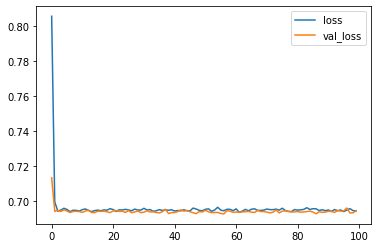

In [6]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

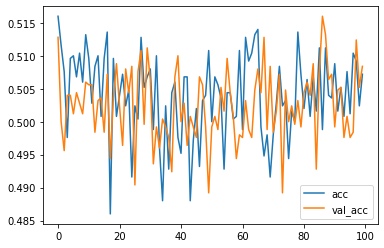

In [7]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
inputs = np.expand_dims(X, -1)
i = Input(shape=(T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(optimizer=Adam(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
r = model.fit(inputs, Y,
              validation_split=0.5,
              epochs=200)

Epoch 1/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6979 - accuracy: 0.5336 - val_loss: 0.6825 - val_accuracy: 0.5704
Epoch 2/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6701 - accuracy: 0.6024 - val_loss: 0.6500 - val_accuracy: 0.6516
Epoch 3/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6278 - accuracy: 0.6868 - val_loss: 0.5895 - val_accuracy: 0.7556
Epoch 4/200
79/79 [==============================] - 1s 11ms/step - loss: 0.5536 - accuracy: 0.7576 - val_loss: 0.5078 - val_accuracy: 0.8056
Epoch 5/200
79/79 [==============================] - 1s 11ms/step - loss: 0.4566 - accuracy: 0.8356 - val_loss: 0.4109 - val_accuracy: 0.8592
Epoch 6/200
79/79 [==============================] - 1s 11ms/step - loss: 0.3654 - accuracy: 0.8804 - val_loss: 0.3335 - val_accuracy: 0.8916
Epoch 7/200
79/79 [==============================] - 1s 11ms/step - loss: 0.3005 - accuracy: 0.9096 - val_loss: 0.2778 - val_accuracy: 0.9144
Epoch 

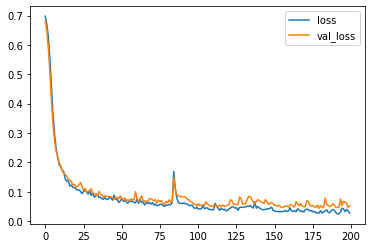

In [10]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

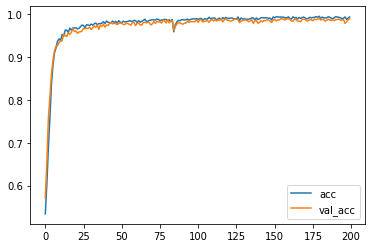

In [11]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [13]:
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6977 - accuracy: 0.5156 - val_loss: 0.7032 - val_accuracy: 0.4892
Epoch 2/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6923 - accuracy: 0.5192 - val_loss: 0.6991 - val_accuracy: 0.4968
Epoch 3/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6905 - accuracy: 0.5248 - val_loss: 0.7003 - val_accuracy: 0.4976
Epoch 4/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6913 - accuracy: 0.5160 - val_loss: 0.6978 - val_accuracy: 0.5120
Epoch 5/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6795 - accuracy: 0.5700 - val_loss: 0.6774 - val_accuracy: 0.5732
Epoch 6/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6529 - accuracy: 0.6244 - val_loss: 0.6489 - val_accuracy: 0.6384
Epoch 7/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6579 - accuracy: 0.6220 - val_loss: 0.6443 - val_accuracy: 0.6376
Epoch 

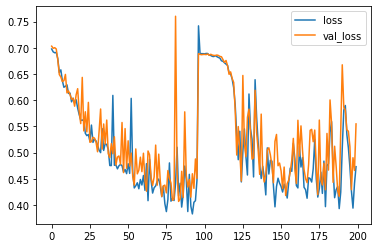

In [14]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

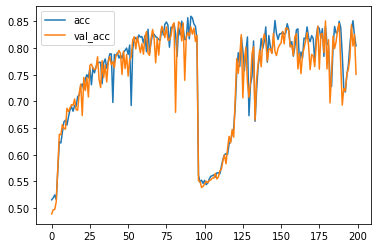

In [15]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [16]:
inputs = np.expand_dims(X, -1)
i = Input(shape=(T, D))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(optimizer=Adam(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])
r = model.fit(inputs, Y,
              validation_split=0.5,
              epochs=200)

Epoch 1/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6954 - accuracy: 0.5100 - val_loss: 0.6951 - val_accuracy: 0.4884
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.5260 - val_loss: 0.6957 - val_accuracy: 0.5096
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5152 - val_loss: 0.6943 - val_accuracy: 0.4952
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6923 - accuracy: 0.5028 - val_loss: 0.6946 - val_accuracy: 0.5016
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.5152 - val_loss: 0.6955 - val_accuracy: 0.4916
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5184 - val_loss: 0.6942 - val_accuracy: 0.4988
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.5028 - val_loss: 0.6948 - val_accuracy: 0.4956
Epoch 8/200
7

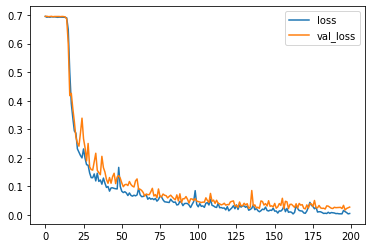

In [17]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

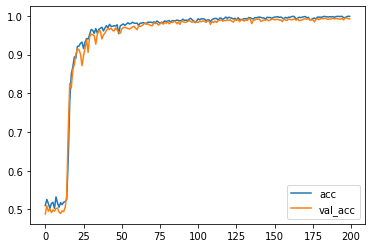

In [18]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [20]:
inputs = np.expand_dims(X, -1)

# make the RNN
i = Input(shape=(T, D))

# method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  inputs, Y,
  epochs=200,
  validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 1s 18ms/step - loss: 0.7070 - accuracy: 0.5000 - val_loss: 0.6964 - val_accuracy: 0.5128
Epoch 2/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6982 - accuracy: 0.4928 - val_loss: 0.6976 - val_accuracy: 0.4992
Epoch 3/200
79/79 [==============================] - 1s 17ms/step - loss: 0.6949 - accuracy: 0.5108 - val_loss: 0.6946 - val_accuracy: 0.4980
Epoch 4/200
79/79 [==============================] - 1s 17ms/step - loss: 0.6959 - accuracy: 0.5004 - val_loss: 0.6954 - val_accuracy: 0.4896
Epoch 5/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6950 - accuracy: 0.5132 - val_loss: 0.6934 - val_accuracy: 0.5140
Epoch 6/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6946 - accuracy: 0.5116 - val_loss: 0.6947 - val_accuracy: 0.4880
Epoch 7/200
79/79 [==============================] - 1s 17ms/step - loss: 0.6965 - accuracy: 0.4988 - val_loss: 0.6967 - val_accuracy: 0.4932
Epoch 

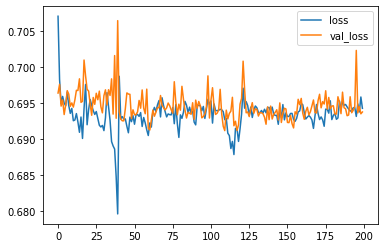

In [21]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

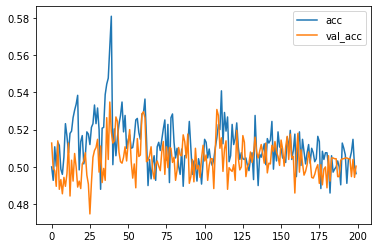

In [22]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [23]:
inputs = np.expand_dims(X, -1)
i = Input(shape=(T, D))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(optimizer=Adam(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])
r = model.fit(inputs, Y,
              validation_split=0.5,
              epochs=200)

Epoch 1/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6947 - accuracy: 0.5080 - val_loss: 0.6936 - val_accuracy: 0.5004
Epoch 2/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5188 - val_loss: 0.6939 - val_accuracy: 0.4868
Epoch 3/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5196 - val_loss: 0.6942 - val_accuracy: 0.5008
Epoch 4/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6943 - accuracy: 0.4980 - val_loss: 0.6940 - val_accuracy: 0.4988
Epoch 5/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6920 - accuracy: 0.5172 - val_loss: 0.6961 - val_accuracy: 0.4956
Epoch 6/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6948 - val_accuracy: 0.4896
Epoch 7/200
79/79 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5092 - val_loss: 0.6953 - val_accuracy: 0.4952
Epoch 8/200


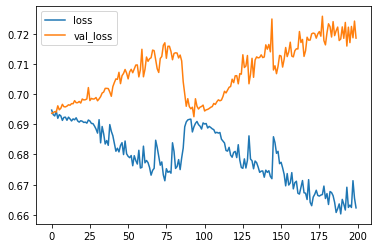

In [24]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

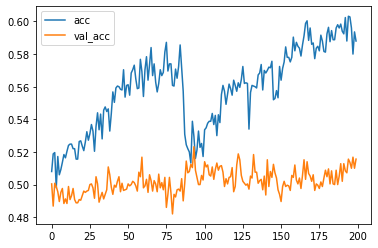

In [25]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [26]:
inputs = np.expand_dims(X, -1)
i = Input(shape=(T, D))
x = GRU(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(optimizer=Adam(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])
r = model.fit(inputs, Y,
              validation_split=0.5,
              epochs=400)

Epoch 1/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6939 - accuracy: 0.5056 - val_loss: 0.6933 - val_accuracy: 0.5024
Epoch 2/400
79/79 [==============================] - 0s 5ms/step - loss: 0.6938 - accuracy: 0.5024 - val_loss: 0.6938 - val_accuracy: 0.5040
Epoch 3/400
79/79 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.4980 - val_loss: 0.6939 - val_accuracy: 0.4960
Epoch 4/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.5024 - val_loss: 0.6935 - val_accuracy: 0.5008
Epoch 5/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6934 - val_accuracy: 0.4996
Epoch 6/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5124 - val_loss: 0.6935 - val_accuracy: 0.4984
Epoch 7/400
79/79 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5184 - val_loss: 0.6935 - val_accuracy: 0.5020
Epoch 8/400
7

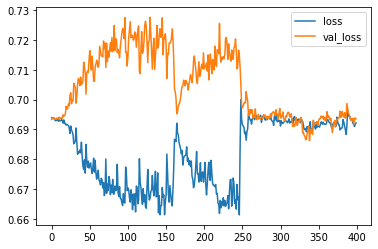

In [27]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

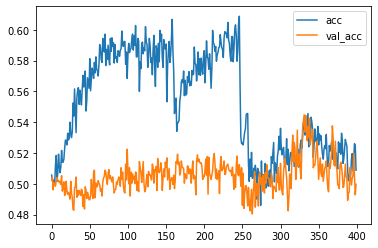

In [28]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [0]:
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [30]:
inputs = np.expand_dims(X, -1)
i = Input(shape=(T, D))
x = LSTM(5)(i)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(optimizer=Adam(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])
r = model.fit(inputs, Y,
              validation_split=0.5,
              epochs=400)

Epoch 1/400
79/79 [==============================] - 1s 10ms/step - loss: 0.6951 - accuracy: 0.4868 - val_loss: 0.6972 - val_accuracy: 0.5052
Epoch 2/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6938 - accuracy: 0.5112 - val_loss: 0.6934 - val_accuracy: 0.5048
Epoch 3/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6934 - accuracy: 0.5112 - val_loss: 0.6940 - val_accuracy: 0.5052
Epoch 4/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6932 - accuracy: 0.5136 - val_loss: 0.6934 - val_accuracy: 0.5008
Epoch 5/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6929 - accuracy: 0.5008 - val_loss: 0.6938 - val_accuracy: 0.5064
Epoch 6/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6924 - accuracy: 0.5152 - val_loss: 0.6939 - val_accuracy: 0.5076
Epoch 7/400
79/79 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5116 - val_loss: 0.6943 - val_accuracy: 0.5088
Epoch 8/400


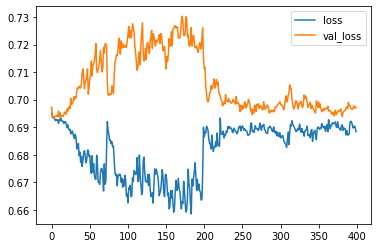

In [31]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

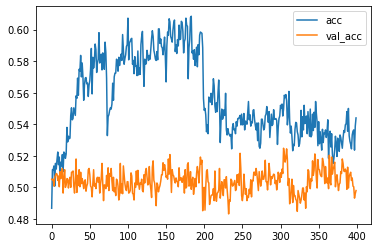

In [32]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [37]:
inputs = np.expand_dims(X, -1)
i = Input(shape=(T, D))
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(optimizer=Adam(lr=0.01),
              loss='binary_crossentropy',
              metrics=['accuracy'])
r = model.fit(inputs, Y,
              validation_split=0.5,
              epochs=100)

Epoch 1/100
79/79 [==============================] - 1s 10ms/step - loss: 0.6943 - accuracy: 0.5000 - val_loss: 0.6947 - val_accuracy: 0.5024
Epoch 2/100
79/79 [==============================] - 1s 6ms/step - loss: 0.6933 - accuracy: 0.5156 - val_loss: 0.6962 - val_accuracy: 0.5060
Epoch 3/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6927 - accuracy: 0.5036 - val_loss: 0.6971 - val_accuracy: 0.5048
Epoch 4/100
79/79 [==============================] - 0s 6ms/step - loss: 0.6935 - accuracy: 0.5172 - val_loss: 0.6939 - val_accuracy: 0.4968
Epoch 5/100
79/79 [==============================] - 1s 7ms/step - loss: 0.6925 - accuracy: 0.5128 - val_loss: 0.6948 - val_accuracy: 0.5080
Epoch 6/100
79/79 [==============================] - 1s 6ms/step - loss: 0.6916 - accuracy: 0.5220 - val_loss: 0.6937 - val_accuracy: 0.5072
Epoch 7/100
79/79 [==============================] - 1s 6ms/step - loss: 0.6916 - accuracy: 0.5284 - val_loss: 0.6976 - val_accuracy: 0.5032
Epoch 8/100


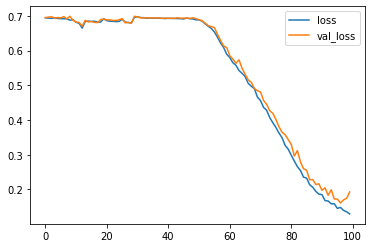

In [38]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

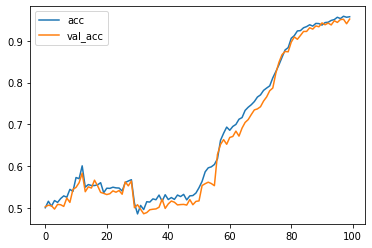

In [39]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()